In [1]:
library(tidyverse)
options(repr.plot.width = 7)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)


In [2]:
species_1 <- 'drerio'
species_2 <- 'xtropicalis'

In [3]:
tbl <- read_csv(paste0("../homology_mapped_o2o_", species_1, "_", species_2, "_1TPM.csv"))

New names:
• `` -> `...1`
Rows: 5637 Columns: 57
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, xtropicalis_homolog_ensembl_gene, xtropicalis_hom...
dbl (31): ...1, mean_exp_drerio, min_exp_drerio, max_exp_drerio, max_2nd_dre...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
intersection_length <- function(list1, list2) {
  length(intersect(list1, list2))
}

In [5]:
union_length <- function(list1, list2) {
  length(union(list1, list2))
}

In [6]:
head(tbl)

...1,ensembl_gene_id,xtropicalis_homolog_ensembl_gene,xtropicalis_homolog_orthology_type,xtropicalis_homolog_associated_gene_name,gene_drerio,mean_exp_drerio,min_exp_drerio,max_exp_drerio,max_2nd_drerio,⋯,enrichment_group_xtropicalis,n_enriched_xtropicalis,max_2nd_or_lim_xtropicalis,exps_enhanced_xtropicalis,n_enhanced_xtropicalis,enhanced_in_xtropicalis,spec_category_xtropicalis,dist_category_xtropicalis,spec_score_xtropicalis,enriched_groups_xtropicalis
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
0,ENSDARG00000069301,ENSXETG00000042724,ortholog_one2one,tmem177,tmem177,0.1836475,0,0.6351,0.4179,⋯,NA,0,0.3802,[],0,NA,lowly expressed,lowly expressed,0,NA
1,ENSDARG00000104901,ENSXETG00000021099,ortholog_one2one,ostc,ostc,2.8865300,0,12.9463,5.4093,⋯,Cement_gland_primordium;Endothelial;Epidermal_progenitor;Goblet_cell;Hatching_gland;Heart;Intermediate_mesoderm;Ionocyte;Myeloid_progenitors;Neuroendocrine_cell;Notochord;Notoplate;Olfactory_placode;Otic_placode;Placodal_area;Pronephric_mesenchyme;Rohon_beard_neuron;Small_secretory_cells,0,19.8031,[],0,NA,low cell type specificity,expressed in over 90%,0,NA
2,ENSDARG00000103391,ENSXETG00000018133,ortholog_one2one,rab9b,rab9b,0.0409025,0,0.1370,0.1298,⋯,NA,0,0.3231,[],0,NA,lowly expressed,lowly expressed,0,NA
3,ENSDARG00000030463,ENSXETG00000047601,ortholog_one2one,tppp3,tppp3,0.1999950,0,6.2683,0.9083,⋯,NA,0,0.1266,[],0,NA,lowly expressed,lowly expressed,0,NA
4,ENSDARG00000070447,ENSXETG00000017909,ortholog_one2one,slc39a9,slc39a9,0.0924725,0,0.6388,0.1795,⋯,Blastula;Cement_gland_primordium;Endoderm;Germline;Goblet_cell;Hatching_gland;Involuting_marginal_zone;Ionocyte;Neuroectoderm;Neuroendocrine_cell;Neuron;Non_neural_ectoderm;Notochord;Optic;Spemann_organizer,0,2.2668,[],0,NA,low cell type specificity,expressed in over 30%,0,NA
5,ENSDARG00000029612,ENSXETG00000007727,ortholog_one2one,gpkow,gpkow,0.4886000,0,1.5877,0.9333,⋯,Blastula;Notochord,0,1.0623,[],0,NA,low cell type specificity,expressed in less than 30%,0,NA


In [7]:
tbl = tbl %>% select(eval(paste0(species_2, "_homolog_associated_gene_name")), 
                     eval(paste0("gene_", species_1)), 
                     eval(paste0("enriched_groups_", species_2)), 
                     eval(paste0("enriched_groups_", species_1)), 
                     eval(paste0("spec_category_", species_2)), 
                     eval(paste0("spec_category_", species_1))) %>% 
mutate(enriched_groups_sp1 = strsplit(get(paste0("enriched_groups_", species_1)), split = ';'))%>% 
mutate(enriched_groups_sp2 = strsplit(get(paste0("enriched_groups_", species_2)), split = ';'))

In [8]:
head(tbl)

xtropicalis_homolog_associated_gene_name,gene_drerio,enriched_groups_xtropicalis,enriched_groups_drerio,spec_category_xtropicalis,spec_category_drerio,enriched_groups_sp1,enriched_groups_sp2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<list>
tmem177,tmem177,NA,NA,lowly expressed,lowly expressed,NA,NA
ostc,ostc,NA,Hatching_gland,low cell type specificity,cell type enhanced,Hatching_gland,NA
rab9b,rab9b,NA,NA,lowly expressed,lowly expressed,NA,NA
tppp3,tppp3,NA,Forerunner_cells,lowly expressed,cell type enriched,Forerunner_cells,NA
slc39a9,slc39a9,NA,NA,low cell type specificity,lowly expressed,NA,NA
gpkow,gpkow,NA,NA,low cell type specificity,low cell type specificity,NA,NA


In [20]:
tbl <- read_csv(paste0("../homology_mapped_o2o_", species_1, "_", species_2, "_1TPM.csv"))

tbl = tbl %>% filter(spec_category_xtropicalis %in% c("cell type enhanced", "cell type enriched")) %>% 
filter(spec_category_drerio %in% c("cell type enhanced", "cell type enriched"))

tbl = tbl %>% select(eval(paste0(species_2, "_homolog_associated_gene_name")), 
                     eval(paste0("gene_", species_1)), 
                     eval(paste0("enriched_groups_", species_2)), 
                     eval(paste0("enriched_groups_", species_1)), 
                     eval(paste0("spec_category_", species_2)), 
                     eval(paste0("spec_category_", species_1))) %>% 
mutate(enriched_groups_sp1 = strsplit(get(paste0("enriched_groups_", species_1)), split = ';'))%>% 
mutate(enriched_groups_sp2 = strsplit(get(paste0("enriched_groups_", species_2)), split = ';'))

tbl_fig = tbl %>% 
mutate(spec_category_sp2 = get(paste0("spec_category_", species_2)))%>% 
mutate(spec_category_sp1 = get(paste0("spec_category_", species_1))) %>% 
rowwise() %>%
mutate(n_intersect = intersection_length(enriched_groups_sp1, enriched_groups_sp2))%>%
mutate(n_union = union_length(enriched_groups_sp1, enriched_groups_sp2)) %>% 
mutate(n_diff_ct = n_union - n_intersect) %>% 
filter(spec_category_sp2 %in% c("cell type enhanced", "cell type enriched")) %>% 
filter(spec_category_sp1 %in% c("cell type enhanced", "cell type enriched")) %>% 
ungroup() %>% 
group_by(spec_category_sp2, spec_category_sp1) %>% 
mutate(sum_same_ct = sum(n_intersect))%>% 
mutate(sum_diff_ct = sum(n_diff_ct)) %>% 
select(sum_same_ct, sum_diff_ct) %>% 
unique() %>% 
mutate(species_1 = species_1, species_2 = species_2)


pie = tbl_fig %>% 
mutate(category = case_when(
    spec_category_sp1 == spec_category_sp2 & spec_category_sp1 == 'cell type enriched' ~'Stay enriched',
    spec_category_sp1 == spec_category_sp2 & spec_category_sp1 == 'cell type enhanced' ~'Stay enhanced',
    spec_category_sp1 != spec_category_sp2 & spec_category_sp2 == 'cell type enriched' ~'To enriched',
    spec_category_sp1 != spec_category_sp2 & spec_category_sp2 == 'cell type enhanced' ~'To enhanced',
)) %>% 
pivot_longer(cols = c(sum_same_ct, sum_diff_ct), names_to = 'kind', values_to = 'count') %>% 
mutate(kind = gsub("sum_diff_ct", "Different", kind)) %>% 
mutate(kind = gsub("sum_same_ct", "Same", kind)) %>% 
ungroup() %>% 
mutate(pct = count / sum(count)) %>% 
ggplot(aes(x = factor(1), y = pct, fill = category, alpha = kind)) +
geom_bar(stat = 'identity', position='stack', color = 'black', size = 0.2) +
geom_text(aes(x = 1.6, label = scales::percent(pct, accuracy = .1), alpha = NULL), position = position_stack(vjust = .5), show.legend=FALSE) + 
coord_polar(theta = 'y') +
scale_fill_nejm(name = 'Cell type', alpha = 0.8) +
scale_alpha_discrete(name = 'Cell type', range = c(0.3, 0.8)) +
common_0x +
theme(axis.line.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.x = element_blank(),
     axis.line.y = element_blank(),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
labs(title = '')


New names:
• `` -> `...1`
Rows: 5637 Columns: 57
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, xtropicalis_homolog_ensembl_gene, xtropicalis_hom...
dbl (31): ...1, mean_exp_drerio, min_exp_drerio, max_exp_drerio, max_2nd_dre...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Adding missing grouping variables: `spec_category_sp2`, `spec_category_sp1`
Warning message:
“Using alpha for a discrete variable is not advised.”


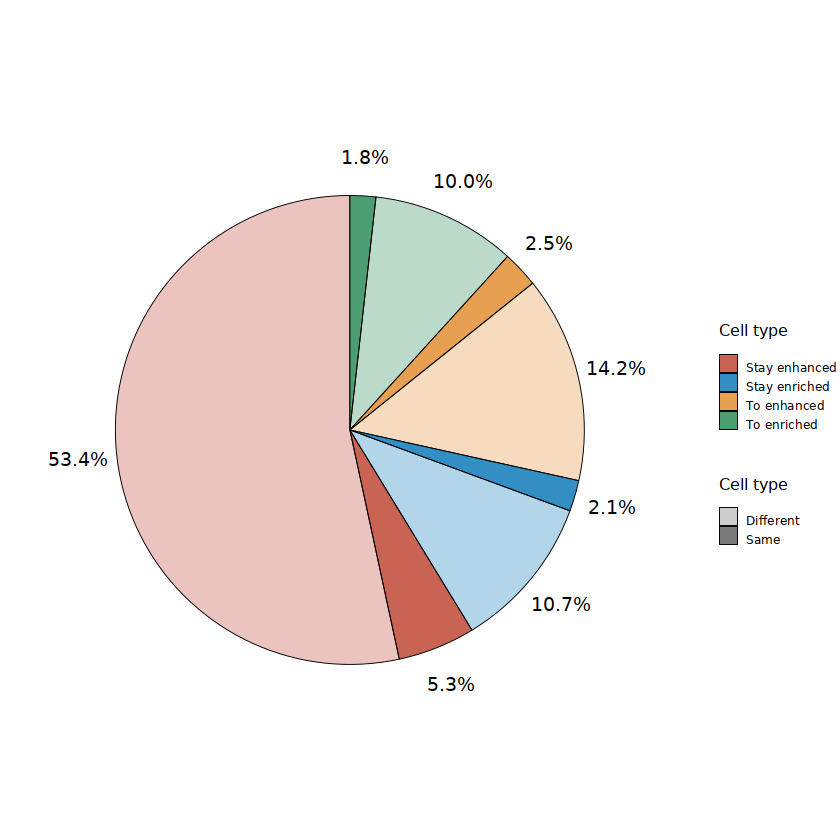

In [21]:
pie

In [30]:
saveRDS(pie, paste0(species_1, "_", species_2, "_spec_cell_type_pct_30_pie.rds"))
ggsave(plot = pie, filename = paste0(species_1, "_", species_2, "_spec_cell_type_pct_30_pie.pdf"), height = 3, width = 4)
    

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”


In [35]:
tbl <- read_csv(paste0("../homology_mapped_o2o_", species_1, "_", species_2, "_1TPM.csv"))

tbl = tbl %>% filter(spec_category_xtropicalis %in% c("group enhanced", "group enriched")) %>% 
filter(spec_category_drerio %in% c("group enhanced", "group enriched"))

tbl = tbl %>% select(eval(paste0(species_2, "_homolog_associated_gene_name")), 
                     eval(paste0("gene_", species_1)), 
                     eval(paste0("enriched_groups_", species_2)), 
                     eval(paste0("enriched_groups_", species_1)), 
                     eval(paste0("spec_category_", species_2)), 
                     eval(paste0("spec_category_", species_1))) %>% 
mutate(enriched_groups_sp1 = strsplit(get(paste0("enriched_groups_", species_1)), split = ';'))%>% 
mutate(enriched_groups_sp2 = strsplit(get(paste0("enriched_groups_", species_2)), split = ';'))

New names:
• `` -> `...1`
Rows: 5637 Columns: 57
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, xtropicalis_homolog_ensembl_gene, xtropicalis_hom...
dbl (31): ...1, mean_exp_drerio, min_exp_drerio, max_exp_drerio, max_2nd_dre...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [36]:
tbl

xtropicalis_homolog_associated_gene_name,gene_drerio,enriched_groups_xtropicalis,enriched_groups_drerio,spec_category_xtropicalis,spec_category_drerio,enriched_groups_sp1,enriched_groups_sp2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<list>
golph3l,golph3l,Goblet_cell;Hatching_gland,Forerunner_cells;Secretory_epidermal,group enhanced,group enhanced,"Forerunner_cells , Secretory_epidermal","Goblet_cell , Hatching_gland"
klf17,klf17,Cement_gland_primordium;Goblet_cell,Blood;Dorsal_organizer;Hatching_gland,group enhanced,group enriched,"Blood , Dorsal_organizer, Hatching_gland","Cement_gland_primordium, Goblet_cell"
kcnk6,kcnk6,Notochord;Spemann_organizer,Nanog_high;Notochord,group enhanced,group enhanced,"Nanog_high, Notochord","Notochord , Spemann_organizer"
sox10,sox10,Neural_crest;Otic_placode,Neural_crest;Otic_placode,group enriched,group enriched,"Neural_crest, Otic_placode","Neural_crest, Otic_placode"
chmp4c,chmp4c,Goblet_cell;Hatching_gland,Ionocyte;Secretory_epidermal,group enhanced,group enhanced,"Ionocyte , Secretory_epidermal","Goblet_cell , Hatching_gland"
tp63,tp63,Epidermal_progenitor;Olfactory_placode;Placodal_area,Epidermal_progenitor;Non_neural_ectoderm;Placodal_area,group enhanced,group enhanced,"Epidermal_progenitor, Non_neural_ectoderm , Placodal_area","Epidermal_progenitor, Olfactory_placode , Placodal_area"
foxj1.2,foxj1b,Epidermal_progenitor;Otic_placode,Notoplate;Olfactory_placode,group enriched,group enhanced,"Notoplate , Olfactory_placode","Epidermal_progenitor, Otic_placode"
cdkn1a,cdkn1a,Cement_gland_primordium;Germline;Skeletal_muscle,Eye_primordium;Germline,group enhanced,group enhanced,"Eye_primordium, Germline","Cement_gland_primordium, Germline , Skeletal_muscle"
tal1,tal1,Blood;Endothelial,Blood;Endothelial,group enriched,group enriched,"Blood , Endothelial","Blood , Endothelial"


In [38]:
tbl_fig_group = tbl %>% 
mutate(spec_category_sp2 = get(paste0("spec_category_", species_2)))%>% 
mutate(spec_category_sp1 = get(paste0("spec_category_", species_1))) %>% 
rowwise() %>%
mutate(n_intersect = intersection_length(enriched_groups_sp1, enriched_groups_sp2))%>%
mutate(n_union = union_length(enriched_groups_sp1, enriched_groups_sp2)) %>% 
mutate(n_diff_ct = n_union - n_intersect) %>% 
filter(spec_category_sp2 %in% c("group enhanced", "group enriched")) %>% 
filter(spec_category_sp1 %in% c("group enhanced", "group enriched")) %>% 
ungroup() %>% 
group_by(spec_category_sp2, spec_category_sp1) %>% 
mutate(sum_same_ct = sum(n_intersect))%>% 
mutate(sum_diff_ct = sum(n_diff_ct)) %>% 
arrange(enriched_groups_sp1) %>% 
select(sum_same_ct, sum_diff_ct) %>% 
unique() %>% 
mutate(species_1 = species_1, species_2 = species_2)


Adding missing grouping variables: `spec_category_sp2`, `spec_category_sp1`


In [40]:
pie_group = tbl_fig_group %>% 
mutate(category = case_when(
    spec_category_sp1 == spec_category_sp2 & spec_category_sp1 == 'group enriched' ~'Stay enriched',
    spec_category_sp1 == spec_category_sp2 & spec_category_sp1 == 'group enhanced' ~'Stay enhanced',
    spec_category_sp1 != spec_category_sp2 & spec_category_sp2 == 'group enriched' ~'To enriched',
    spec_category_sp1 != spec_category_sp2 & spec_category_sp2 == 'group enhanced' ~'To enhanced',
)) %>% 
pivot_longer(cols = c(sum_same_ct, sum_diff_ct), names_to = 'kind', values_to = 'count') %>% 
mutate(kind = gsub("sum_diff_ct", "Different", kind)) %>% 
mutate(kind = gsub("sum_same_ct", "Same", kind)) %>% 
ungroup() %>% 
mutate(pct = count / sum(count)) %>% 
ggplot(aes(x = factor(1), y = pct, fill = category, alpha = kind)) +
geom_bar(stat = 'identity', position='stack', color = 'black', size = 0.2) +
geom_text(aes(x = 1.6, label = scales::percent(pct, accuracy = .1), alpha = NULL), position = position_stack(vjust = .5), show.legend=FALSE) + 
coord_polar(theta = 'y') +
scale_fill_nejm(name = 'Cell type', alpha = 0.8) +
scale_alpha_discrete(name = 'Cell type', range = c(0.3, 0.8)) +
common_0x +
theme(axis.line.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.x = element_blank(),
     axis.line.y = element_blank(),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
labs(title = '')

Warning message:
“Using alpha for a discrete variable is not advised.”


In [41]:
saveRDS(pie_group, paste0(species_1, "_", species_2, "_spec_group_pct_30_pie.rds"))
ggsave(plot = pie_group, filename = paste0(species_1, "_", species_2, "_spec_group_pct_30_pie.pdf"), height = 3, width = 4)
    

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
